## Evolutionary Algorithms (EA)

* Nature inspired optimization algorithms

* Conduct optimization with a *population* of solutions

* Optimization occurs over a number of *generations*

* Individuals in a population *recombine* their properties to form offsprings

* A *selection operator* chooses which solutions stay alive and which don't.

In [1]:
import desdeo_emo

help(desdeo_emo)

Help on package desdeo_emo:

NAME
    desdeo_emo

PACKAGE CONTENTS
    EAs (package)
    population (package)
    problem (package)
    recombination (package)
    selection (package)
    surrogatemodels (package)
    utilities (package)

FILE
    e:\projects\desdeo-emo\desdeo_emo\__init__.py




## General Structure

- Initialization

- Generation loop

    - Create Offsprings

    - Evaluate Offsprings
  
    - Selection for next generation

```python
class EA():
    def __init__(self):
        self.population = Population()
        self.selection = Selection()

    def next_gen(self):
        offspring = self.population.mate()
        self.population.add(offspring)
        ind_to_keep = self.selection.do()
        self.population.keep(ind_to_keep)
```

## General Structure

Many EAs group together a number of generations into an "iteration".

- Initialization
- Iteration loop
  - Pre-iteration steps
  - Generation loop
  - Post-iteration steps
- Termination

```python
class New_EA(EA):
    def pre_iteration(self):
        some_things()
       
    def post_iteration(self):
        other_things()
    
```
```python
    def iterate(self):
        self.pre_iteration()
        while condition:
            self.next_gen()
        self.post_iteration()

    def end(self):
        final_things()
```

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from desdeo_problem import (
    variable_builder, VectorObjective, MOProblem)
import numpy as np
import pandas as pd

variables = variable_builder(
    names = ["x_1", "x_2"],
    initial_values = [0.5,0.5],
    lower_bounds = [0, 0],
    upper_bounds = [1, 1]
)

def y(x):
    y1 = (x[:, 0] + x[:, 1]) / 2
    y2 = (x[:, 0] - x[:, 1] + 1) / 2
    return np.array((y1,y2)).T

objectives = VectorObjective(
    name=["y_1", "y_2"],
    evaluator=y,
)

problem = MOProblem(
    objectives=[objectives],
    variables=variables
)

In [4]:
print(
    problem.evaluate(
        np.array([[0.5, 0.7]])
))

Evaluation Results Object 
Objective values are: 
[[0.6 0.4]]
Constraint violation values are: 
None
Fitness values are: 
[[0.6 0.4]]
Uncertainity values are: 
[[nan nan]]



In [23]:
from desdeo_emo.EAs import NSGAIII
# DESDEO provides implementations of NSGA-III, and RVEA.

evolver = NSGAIII(
    problem,
    population_size=10,
    n_gen_per_iter=3,
    n_iterations=10,
    #keep_archive=True
)

In [24]:
evolver.start()
while evolver.continue_evolution():
    evolver.iterate()
ind, objs, archive = evolver.end()

In [12]:
archive

{0: {'iteration': 0,
  'decision variables':         x_1       x_2
  0  0.933066  0.442866
  1  0.157865  0.104562
  2  0.725658  0.832093
  3  0.283686  0.900714
  4  0.432174  0.505876
  5  0.833533  0.389522
  6  0.539353  0.051063
  7  0.315098  0.734798
  8  0.033415  0.624876
  9  0.693950  0.283658,
  'objectives':         y_1       y_2
  0  0.687966  0.745100
  1  0.131213  0.526651
  2  0.778876  0.446783
  3  0.592200  0.191486
  4  0.469025  0.463149
  5  0.611528  0.722006
  6  0.295208  0.744145
  7  0.524948  0.290150
  8  0.329146  0.204269
  9  0.488804  0.705146,
  'fitness':         y_1       y_2
  0  0.687966  0.745100
  1  0.131213  0.526651
  2  0.778876  0.446783
  3  0.592200  0.191486
  4  0.469025  0.463149
  5  0.611528  0.722006
  6  0.295208  0.744145
  7  0.524948  0.290150
  8  0.329146  0.204269
  9  0.488804  0.705146},
 3: {'iteration': 1,
  'decision variables':         x_1       x_2
  0  0.033415  0.624876
  1  0.040182  0.426177
  2  0.040208  0.4241

In [7]:
# Restructuring data in "archive" to "solutions" in a usable format for visualization

solutions = pd.DataFrame(columns=["y_1", "y_2", "iteration"], dtype=float)
for gen_index in archive:
    current = pd.DataFrame(columns=["y_1", "y_2", "iteration"], index=range(10))
    current["y_1"] = archive[gen_index]["objectives"]["y_1"][archive[gen_index]["objectives"]["y_1"].argsort()].reset_index(drop=True)
    current["y_2"] = archive[gen_index]["objectives"]["y_2"][archive[gen_index]["objectives"]["y_1"].argsort()].reset_index(drop=True)
    current["iteration"] = archive[gen_index]["iteration"]
    solutions = solutions.append([current])

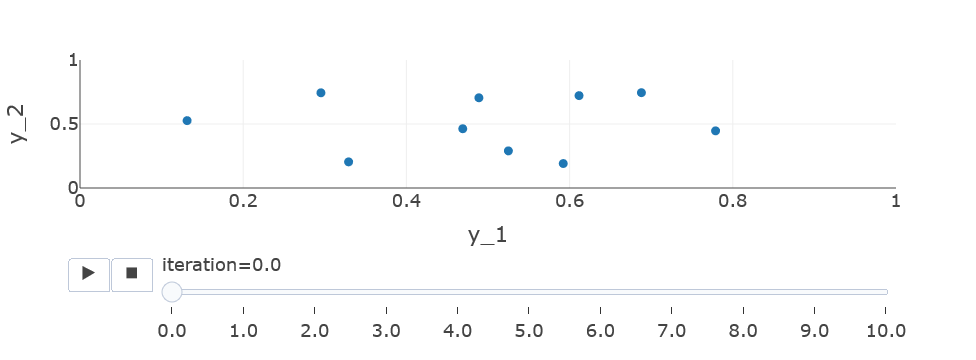

In [25]:
import plotly.express as ex
import plotly.io as pio

pio.templates.default="presentation"

ex.scatter(
    solutions,
    x="y_1",
    y="y_2",
    animation_frame="iteration",
    range_x=[0, 1],
    range_y=[0,1]
)